In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib inline

In [2]:
domain = 'finance'
path = '{}/rankings/'.format(domain)

Test to analyse the similarity distribution among the different rankings obtained

In [5]:
distr_1 = pd.read_csv(path+'ranking_community_h.csv')
distr_1.head()

,username,similarity
0,michaelpachter,0.990045
1,nicolas_veron,0.989152
2,epicgames,0.988821
3,fbonacci,0.988299
4,odtorson,0.986788


In [8]:
distr_1['truncated'] = distr_1.apply(lambda x: float('%.3f'%(x['similarity'])), axis=1)

In [9]:
distr_1.head()

,username,similarity,truncated
0,michaelpachter,0.990045,0.990
1,nicolas_veron,0.989152,0.989
2,epicgames,0.988821,0.989
3,fbonacci,0.988299,0.988
4,odtorson,0.986788,0.987


In [14]:
y = distr_1.groupby(by='truncated').count().reset_index()[['truncated','similarity']]
y.columns = ['sim','freq']
y.sort_values(by='sim', inplace=True)

In [26]:
labeled_pos = [0, 50, 100, 130, y.shape[0]-1]
label_ticks = list(y.iloc[labeled_pos]['sim'])
label_ticks

[0.74199999999999999,
 0.83599999999999997,
 0.89400000000000002,
 0.92400000000000004,
 0.98999999999999999]

([<matplotlib.axis.XTick at 0x1235af28>,
 <a list of 5 Text xticklabel objects>)

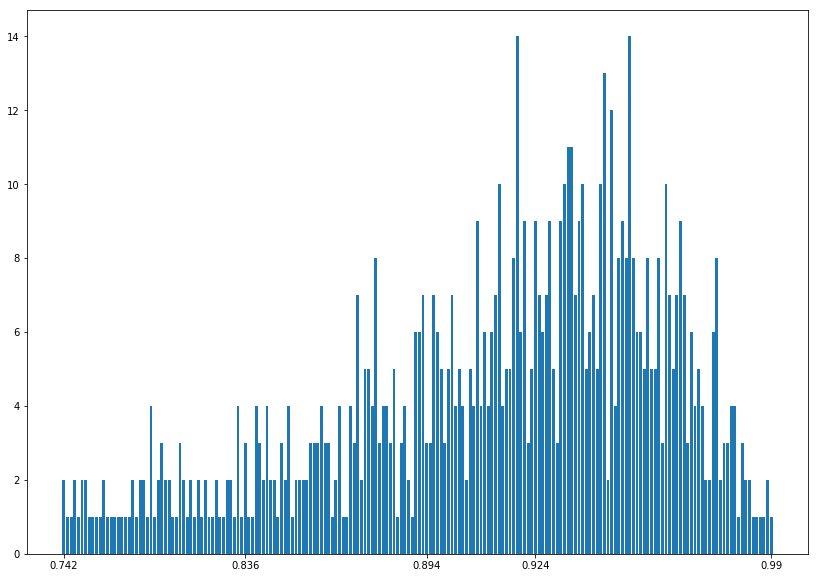

In [28]:
x = range(y.shape[0])
bar_width = 0.8

plt.figure(figsize=(14,10))
plt.bar(x, y['freq'],bar_width)
plt.xticks(labeled_pos, label_ticks)
#plt.tick_params(labelsize=8)

Define a function and apply to all the rankings to check if they are similar or not

In [11]:
def computeSimDistribution(ranking, float_prec, title):
    prec_str = '%.{}f'.format(float_prec)
    ranking['truncated'] = ranking.apply(lambda x: float(prec_str%(x['similarity'])), axis=1)
    
    y = ranking.groupby(by='truncated').count().reset_index()[['truncated','similarity']]
    y.columns = ['sim','freq']
    y.sort_values(by='sim', inplace=True)
    N = y.shape[0]-1
    
    labeled_pos = [0, N/4, N/2, 3*N/4, N]
    label_ticks = list(y.iloc[labeled_pos]['sim'])
    
    x = range(y.shape[0])
    bar_width = 0.8

    plt.figure(figsize=(14,10))
    plt.title(title)
    plt.bar(x, y['freq'],bar_width)
    plt.xticks(labeled_pos, label_ticks)
    
    mu = np.mean(y['freq'])
    sigma = np.std(y['freq'])
   
    print mu, sigma

30.3076923077 25.8200417547
39.7826086957 32.3526176909
39.1176470588 28.3297439887
21.5476190476 29.2030676642
25.4193548387 17.4370280716
24.7297297297 20.955098262


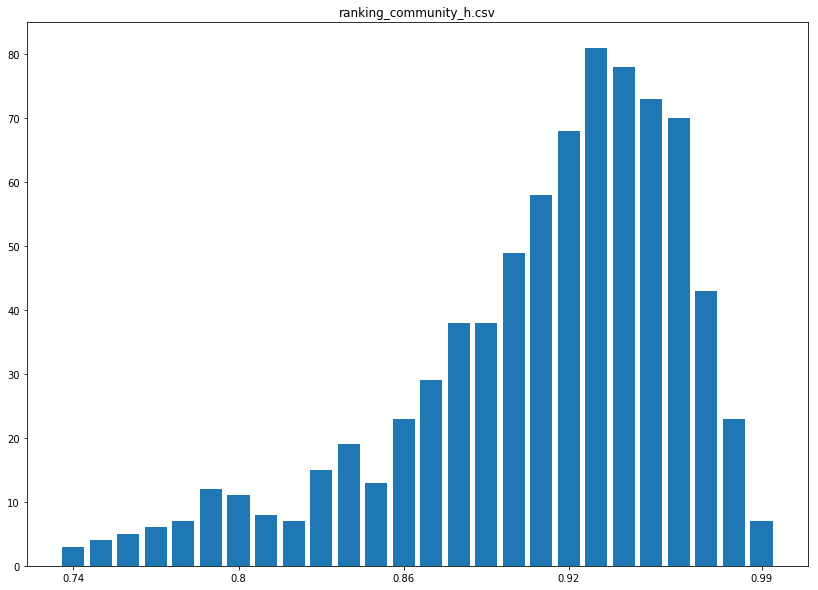

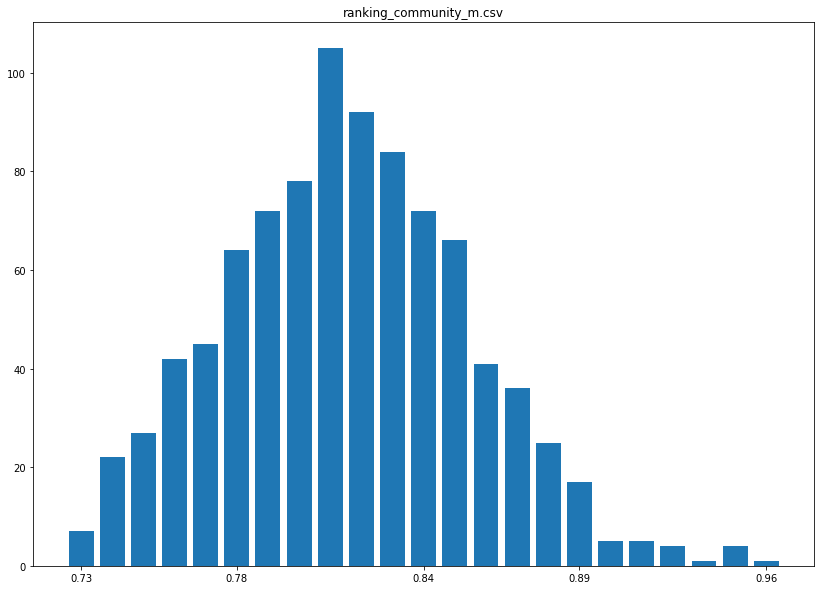

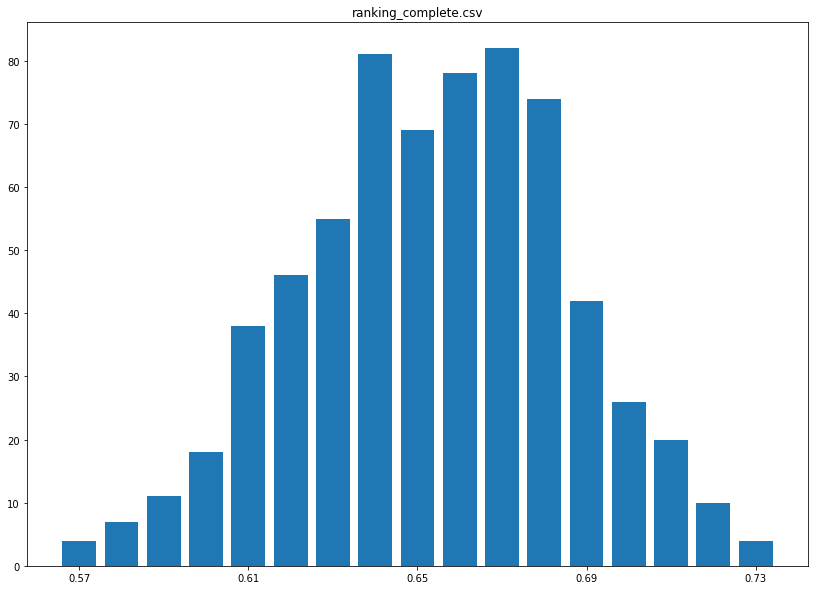

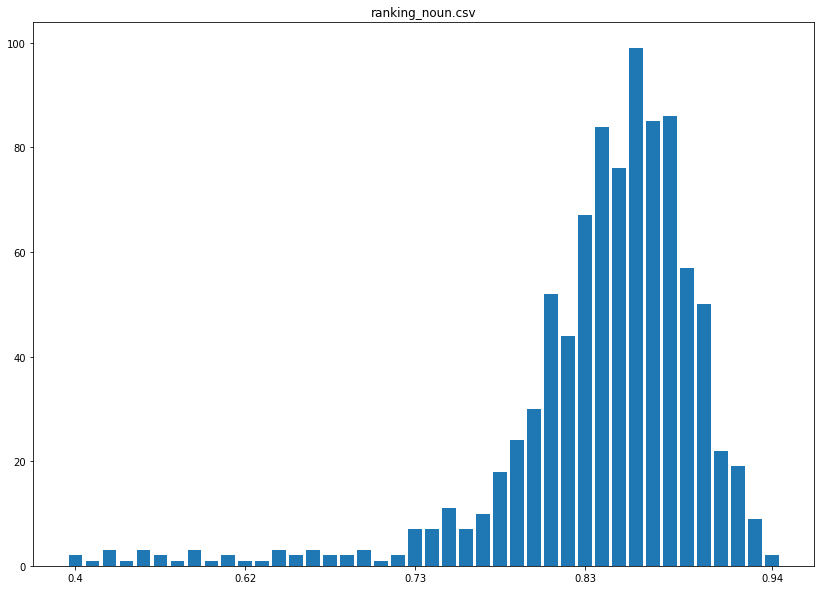

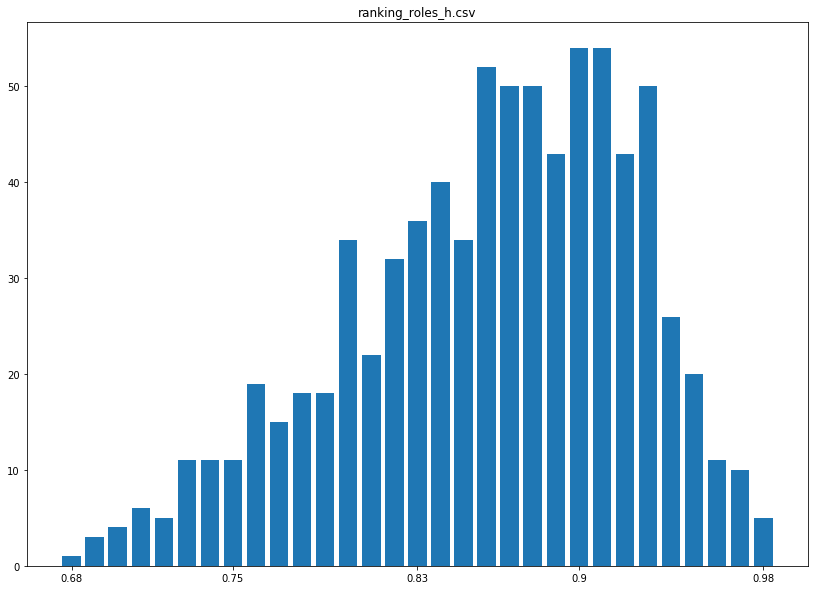

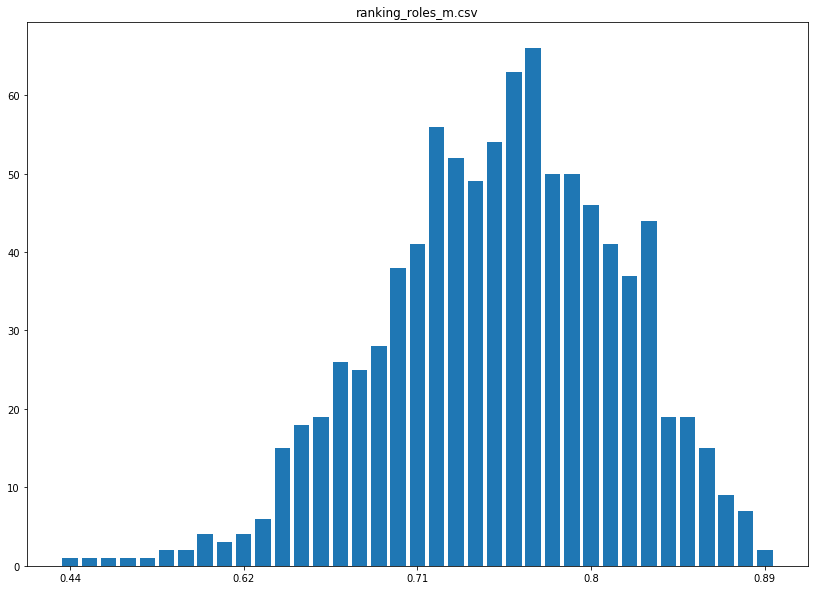

In [12]:
for f in os.listdir(path):
    r = pd.read_csv(path+f)
    computeSimDistribution(r, 2, f)